<a href="https://colab.research.google.com/github/frm1789/100DaysOfPython/blob/main/Coursera_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('udemy_courses.csv')


In [3]:
df['year'] = pd.DatetimeIndex(df['published_timestamp']).year
df['month'] = pd.DatetimeIndex(df['published_timestamp']).month

In [4]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['month_year'] = df['published_timestamp'].dt.to_period('M')

In [5]:
df.head(30)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year,month,month_year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.500000,2017-01-18 20:58:58+00:00,Business Finance,2017,1,2017-01
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.000000,2017-03-09 16:34:20+00:00,Business Finance,2017,3,2017-03
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.500000,2016-12-19 19:26:30+00:00,Business Finance,2016,12,2016-12
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.000000,2017-05-30 20:07:24+00:00,Business Finance,2017,5,2017-05
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.000000,2016-12-13 14:57:18+00:00,Business Finance,2016,12,2016-12
5,192870,Trading Penny Stocks: A Guide for All Levels I...,https://www.udemy.com/trading-penny-stocks-a-g...,True,150,9221,138,25,All Levels,3.000000,2014-05-02 15:13:30+00:00,Business Finance,2014,5,2014-05
6,739964,Investing And Trading For Beginners: Mastering...,https://www.udemy.com/investing-and-trading-fo...,True,65,1540,178,26,Beginner Level,1.000000,2016-02-21 18:23:12+00:00,Business Finance,2016,2,2016-02
7,403100,"Trading Stock Chart Patterns For Immediate, Ex...",https://www.udemy.com/trading-chart-patterns-f...,True,95,2917,148,23,All Levels,2.500000,2015-01-30 22:13:03+00:00,Business Finance,2015,1,2015-01
8,476268,Options Trading 3 : Advanced Stock Profit and ...,https://www.udemy.com/day-trading-stock-option...,True,195,5172,34,38,Expert Level,2.500000,2015-05-28 00:14:03+00:00,Business Finance,2015,5,2015-05
9,1167710,The Only Investment Strategy You Need For Your...,https://www.udemy.com/the-only-investment-stra...,True,200,827,14,15,All Levels,1.000000,2017-04-18 18:13:32+00:00,Business Finance,2017,4,2017-04


In [6]:
#Most common words that appear in the name of the course by subject.


In [7]:
level_counts_month_year_by_subject = df.groupby(['subject', 'month_year']).size().unstack(fill_value=0)
level_counts_month_year_by_subject

month_year,2011-07,2011-09,2011-11,2011-12,2012-01,2012-02,2012-04,2012-05,2012-06,2012-07,...,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07
subject,,,,,,,,,,,,,,,,,,,,,
Business Finance,0,0,0,0,0,0,0,0,1,0,...,27,23,36,22,33,32,36,50,37,15
Graphic Design,0,0,0,0,0,0,2,2,2,1,...,10,14,15,12,24,28,25,34,26,6
Musical Instruments,0,0,0,0,1,0,0,0,2,1,...,20,13,17,8,15,23,14,31,16,5
Web Development,1,1,2,1,0,1,2,3,3,1,...,40,47,33,41,42,29,30,38,41,2


In [ ]:
!pip install patchworklib

In [34]:
import patchworklib as pw

<Figure size 100x100 with 0 Axes>

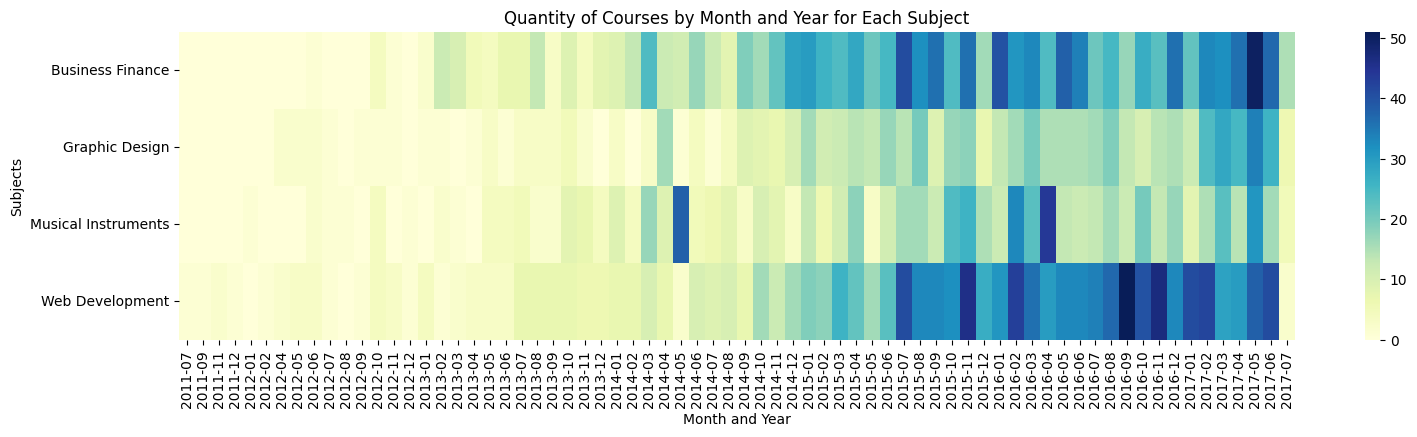

In [8]:
plt.figure(figsize=(18, 4))
sns.heatmap(data=level_counts_month_year_by_subject, annot=False, fmt="d", cmap="YlGnBu", cbar=True)
plt.xlabel("Month and Year")
plt.ylabel("Subjects")
plt.title("Quantity of Courses by Month and Year for Each Subject")
plt.show()




In [9]:
df.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
year                                 int64
month                                int64
month_year                       period[M]
dtype: object

In [10]:
df.isna().sum()


course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
year                   0
month                  0
month_year             0
dtype: int64

In [11]:
df.subject.unique()


array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [12]:
# Count the number of occurrences of each subject
subject_counts = df['subject'].value_counts()

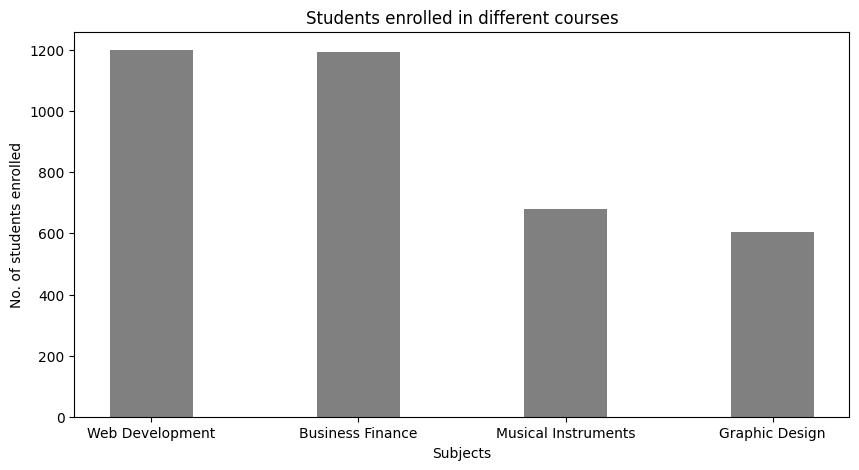

In [13]:
fig = plt.figure(figsize = (10,5))

plt.bar(subject_counts.index,subject_counts.values, color="grey", width=0.4)

plt.xlabel("Subjects")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()



In [14]:
# Count the number of occurrences of each subject / paid courses
subject_counts = df['subject'].value_counts()

In [15]:
subject_counts_paid = df[df['is_paid']]['subject'].value_counts()
subject_counts_non_paid = df[~df['is_paid']]['subject'].value_counts()

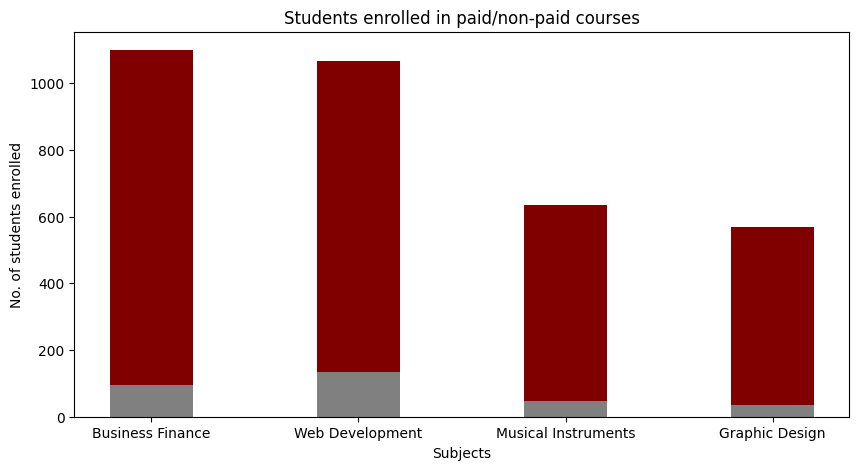

In [16]:
fig, ax = plt.subplots(figsize = (10,5))

ax.bar(subject_counts_paid.index,subject_counts_paid.values, label= 'paid', color = 'maroon', width=0.4)
ax.bar(subject_counts_non_paid.index,subject_counts_non_paid.values, label = 'no paid', color = 'grey', width=0.4)

plt.xlabel("Subjects")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in paid/non-paid courses")
plt.show()


In [17]:
# Level vs. subject
# Is it more probably that you pay more for a course in Web Development vs Musical Instruments?
# The level of the courses are highers in Web Development vs Musical Instruments

In [18]:
# Count the number of occurrences of each subject / paid courses
level_counts = df['level'].value_counts()

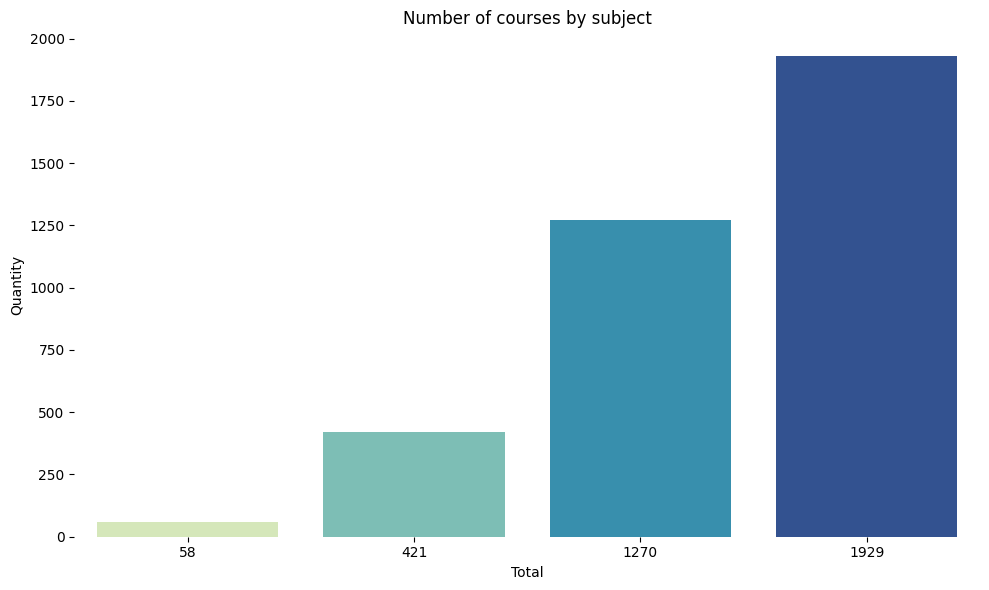

In [19]:

sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))
sns.barplot(data=level_counts, y=level_counts.values, x=level_counts.index, palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel('Total')
plt.ylabel("Quantity")
plt.title("Number of courses by subject")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [20]:
level_counts.index

Index(['All Levels', 'Beginner Level', 'Intermediate Level', 'Expert Level'], dtype='object')

In [21]:
level_counts_by_subject = df.groupby(['subject', 'level']).size().unstack(fill_value=0)
level_counts_by_subject

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Business Finance,696,340,31,128
Graphic Design,298,243,5,57
Musical Instruments,276,296,7,101
Web Development,659,391,15,135


In [22]:

x = np.arange(len(level_counts))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

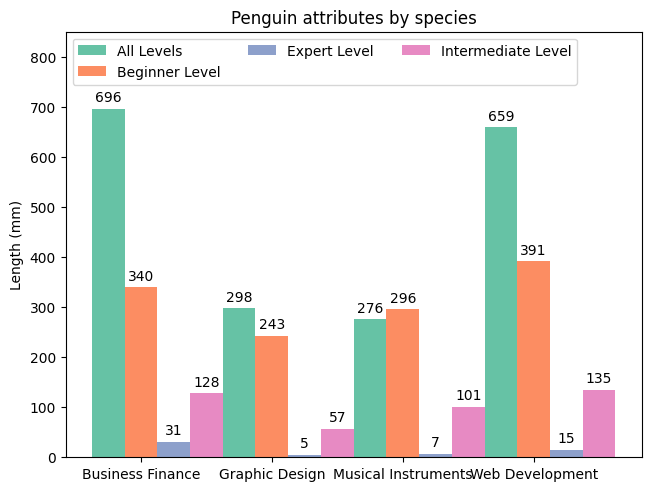

In [23]:
fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in level_counts_by_subject.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, level_counts_by_subject.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,850)

plt.show()

In [24]:
level_counts_by_subject = level_counts_by_subject.drop('All Levels', axis=1)
level_counts_by_subject


level,Beginner Level,Expert Level,Intermediate Level
subject,,,
Business Finance,340,31,128
Graphic Design,243,5,57
Musical Instruments,296,7,101
Web Development,391,15,135


In [25]:
level_counts_by_subject_pct = round(level_counts_by_subject.div(level_counts_by_subject.sum(axis=1), axis=0)*100,2)
level_counts_by_subject_pct

level,Beginner Level,Expert Level,Intermediate Level
subject,,,
Business Finance,68.14,6.21,25.65
Graphic Design,79.67,1.64,18.69
Musical Instruments,73.27,1.73,25.00
Web Development,72.27,2.77,24.95


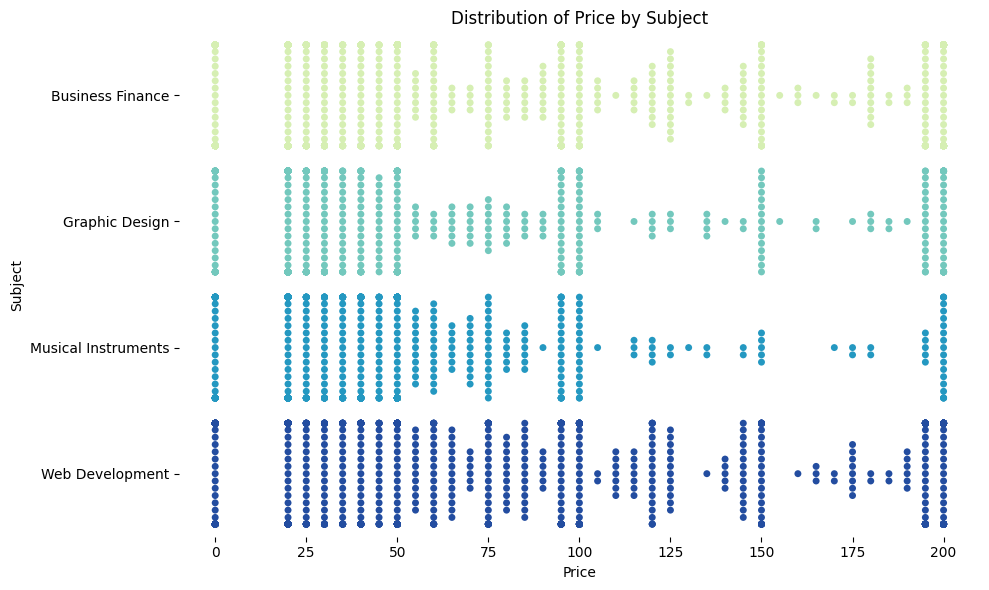

In [26]:
sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df["price"], y=df["subject"], palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel("Price")
plt.ylabel("Subject")
plt.title("Distribution of Price by Subject")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

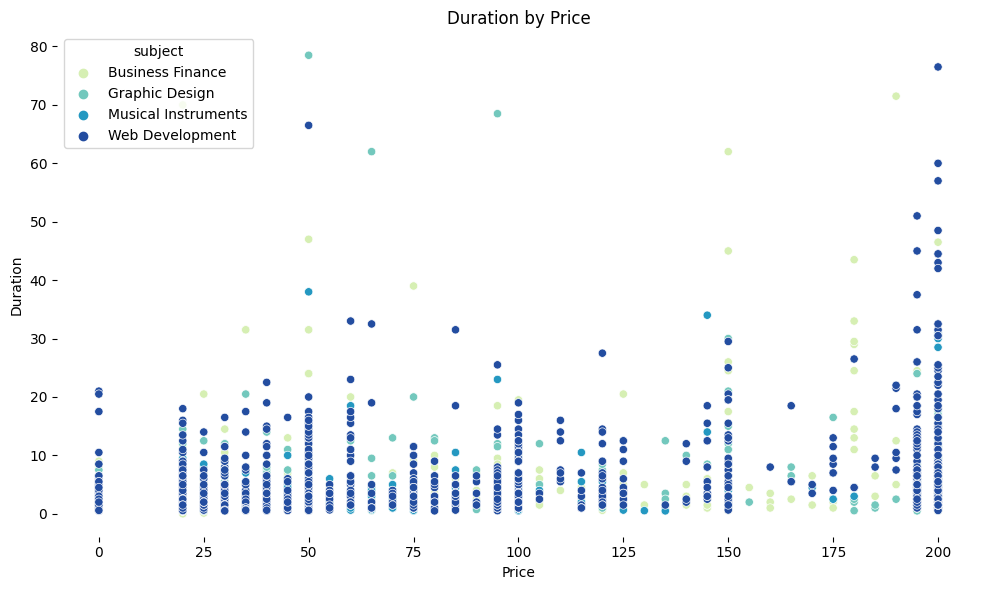

In [27]:
sns.set_palette("Set2")

# Create a violin plot with custom aesthetics
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, hue="subject", y='content_duration', x="price", palette="YlGnBu")
sns.despine(left=True, bottom=True)

# Customize labels and title
plt.xlabel("Price")
plt.ylabel("Duration")
plt.title("Duration by Price")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
# There are more reviews along the time
# Monthly reviews count are highers for older courses.